# Coding Homework 1

## Overview

- [Note](#Note)
- [문제 1](#문제1)
- [문제 2](#문제2)
- [문제 3](#문제3)

# Note

watermark 를 사용하면 해당 주피터의 패키지의 버전을 확인할 수 있다. 
"`pip install watermark`" 를 사용하여 다운 받을 수 있다. 해당 watermark 에 표시되는 다른 패키지도 pip 로 설치 가능하다. 패키지의 버전이 다를 경우 에러가 날 수 있으므로 주의

In [1]:
%load_ext watermark
%watermark -a 'Moon Jeong-Hyeon' -u -d -p numpy,pandas,matplotlib,seaborn,sklearn

Moon Jeong-Hyeon 
last updated: 2020-03-19 

numpy 1.18.1
pandas 1.0.2
matplotlib 3.1.3
seaborn 0.10.0
sklearn 0.22.1


# 제출방식

주어진 주피터 노트북을 바탕으로 워드 파일을 작성한다. 

각각의 문제마다 작성하라고 한 코드 부분(캡처)과 그림, 표, 설명등을 워드에
기입한다.



# 학습목표

* 문제1
    - 판다스, 넘파이등의 파이썬에서 데이터를 다루기위한 패키지를 사용한다.

* 문제2
    - matplotlib 패키지의 scatter plot을 상황에 맞게 사용할 수 있다.
    
* 문제3
    - jittering을 해보고 언제 필요한지 알 수 있다. 
    

# 문제 1 one-hot encoding 및 결측값 처리하기

## 데이터 소개

* 타겟 데이터
 * 1990년 캘리포니아의 각 행정 구역 내 주택 가격의 중앙값

* 특징 데이터 
 - MedInc : 행정 구역 내 소득의 중앙값
 - HouseAge : 행정 구역 내 주택 연식의 중앙값
 - AveRooms : 평균 방 갯수
 - AveBedrms : 평균 침실 갯수
 - Population : 행정 구역 내 인구 수
 - AveOccup : 평균 자가 비율
 - Latitude : 해당 행정 구역의 위도
 - Longitude : 해당 행정 구역의 경도

In [2]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [151]:
import pandas as pd
df = pd.DataFrame(california.data, columns=california.feature_names)
df_target = pd.DataFrame(california.target, columns=["Target"])
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [150]:
df_target.tail()

,Target
20635,0.781
20636,0.771
20637,0.923
20638,0.847
20639,0.894


# 문제1

* 캘리포니아 주택가격 중앙값에서 우리는 저렴한 편의 주택, 중간 주택, 비싼 가격의 주택의 전체적인 특성에 대해서 알고싶다. 현재는 numeric 변수로 이루어져 있기에 이를 분석하기가 쉽지 않다. 

* 중앙값을 카테고리 변수로 만든 후에 one-hot-인코딩을 만드는 메서드를 생성하라.

* 메서드를 구현하는 코드와 해당 메서드를 바탕으로 생성된 dataframe을 보고서에 기입하라.

## 요구사항
* 주어진 캘리포니아 주택가격의 중앙값은 numeric 변수이다.
    - 해당 numeric target 값을 category 변수로 바꾼다. 
        - category 변수로 바꾸기 위해서 범위가 주어진다. ex) bin = [1, 2, 3, 4]
        - 해당 범위에 들어오는 값은 label list의 값을 설정 한다.
            - 해당 범위에 들어오지 않는 sample의 경우 drop 시킨다. 
    - 그후 생성된 category 변수를 바탕으로 one-hot encoding을 만든다. 
    
* 아래에 주어진 메서드를 바탕으로 코드를 짠다. argument나 return 유형이 바뀌어서는 안된다.     

```python

# Args :
#     x = featrue data (pandas dataframe)
#     y = target data (pandas dataframe)
#     bins = list of target data range
#     labels = label of bins
# 
# Return : pandas dataframe

# hint 
# arguments are dataframe, use pandas library
# usd pandas.cut to make categorical variable

def make_onehot(df, target, bins, labels):

"""
구현해야할 부분
보고서에 캡처하세요
"""
    
    return output
```

해당 방법을 바탕으로 제출

In [6]:
import numpy as np

In [1]:
# 주어진 target의 범위
bins = [0.2, 1.7, 2.5, 5]
labels = ["level_1", "level_2", "level_3"]


In [94]:
def make_onehot(df, target, bins, labels):

    return tpp

In [95]:
data = make_onehot(df, target = df_target, bins= bins, labels=labels)

In [96]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,level_1,level_2,level_3
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0,0,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,0,0,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0,0,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0,0,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,1,0,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,1,0,0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,1,0,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,1,0,0


원래 bin의 범위 때문에 target에 결측값이 생기게 되어 샘플수가 줄어드는 것 주의

---

# 문제2

* 문제 1에서 one-hot 인코딩 기반으로 하여 만들어진 dataframe을 바탕으로 scatter plot을 만들어 보고서에 기입 후, 이를 기반으로 얻을 수 있는 사실을 보고서에 서술하세요

In [98]:
import matplotlib.pyplot as plt

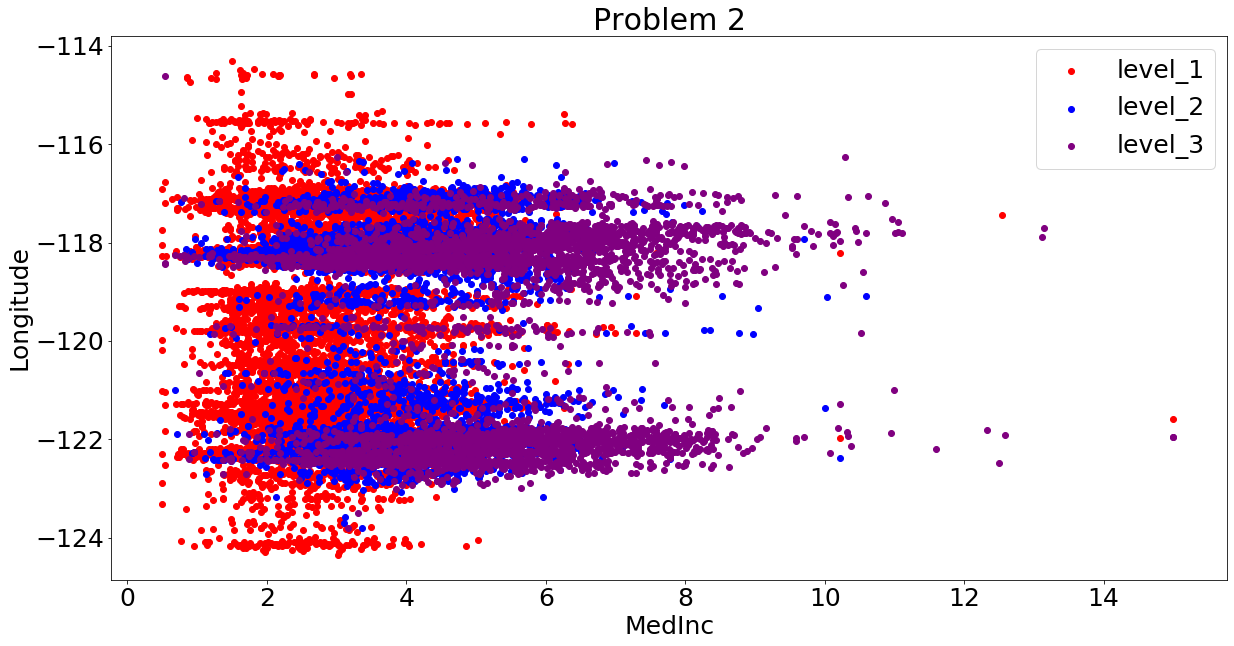

---

# 문제 3

In [144]:
from sklearn.datasets import make_blobs

sklearn 의 make_blobs를 이용하여 만든 데이터 X가 있다. 해당 X를 시각화 하면 다음과 같다.

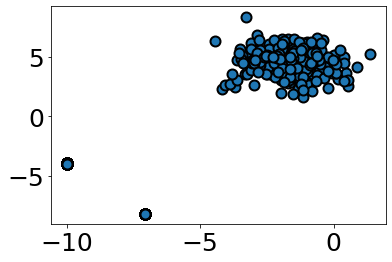

In [145]:
X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=1, cluster_std = 0.001)
X2, _ = make_blobs(n_samples=300, n_features=2, centers=1, random_state=1, cluster_std = 1)
X = np.vstack([X, X2])
plt.scatter(X[:, 0], X[:, 1], marker='o', s=100,
            edgecolor="k", linewidth=2)
plt.show()

데이터 X를 jittering을 주면 다음과 같은 scatter plot을 얻을 수 있다. 

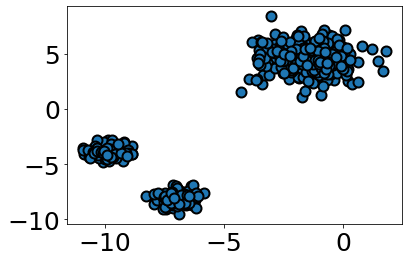

해당 scatter plot와 유사한 그림이 나올수 있도록 jittering을 주고 이러한 jittering이 필요한 경우에 대해서 서술하시오.